# HOUSE PRICE PREDICTION USING LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("mumbai.csv")
df1.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [3]:
df1.shape

(6347, 19)

In [4]:
df1.Location = df1.Location.apply(lambda x: x.strip())

In [5]:
df1.groupby('Location')['Location'].agg('count')

Location
15th Road                         1
4 Bunglows                        2
Adaigaon                          1
Agripada                          1
Airoli                           28
                                 ..
matunga east                      1
no 9                              1
sec 50 new                        1
taloja panchanand                 1
thakur village kandivali east     2
Name: Location, Length: 412, dtype: int64

In [6]:
df1.isnull().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [7]:
df1['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [8]:
df1.rename({'No. of Bedrooms':'BHK'}, axis = 1, inplace = True)
df1

,Unnamed: 0,Price,Area,Location,BHK,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df1[df1.BHK>5]

,Unnamed: 0,Price,Area,Location,BHK,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
962,962,70000000,2000,Mumbai,6,0,1,1,1,1,1,0,1,0,0,0,0,0,0
977,977,50000000,7000,Kalyan,6,0,0,0,1,1,1,0,0,0,0,0,0,0,0
1592,1592,25000000,2500,Sea Face,7,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1600,1600,120000000,3500,Upper Worli,7,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1621,1621,260000000,5642,Sion,6,0,1,1,1,0,1,0,1,0,1,1,1,1,1
2011,2011,65000000,2590,Kandivali East,6,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2126,2126,77500000,3507,Goregaon,6,1,1,1,1,1,1,0,1,1,1,1,0,1,1
5378,5378,50000000,2500,Andheri East,6,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6279,6279,79000000,3300,Goregaon East,6,0,1,1,0,0,0,1,1,1,1,0,1,1,1


In [10]:
df1.Area.unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [11]:
df1[['Area','BHK','Price']].head(20)

,Area,BHK,Price
0,720,1,4850000
1,600,1,4500000
2,650,1,6700000
3,650,1,4500000
4,665,1,5000000
5,2000,4,17000000
6,1550,3,12500000
7,1370,3,10500000
8,1356,3,10500000
9,1680,3,15000000


In [12]:
df2=df1.copy()

In [13]:
df2 = df1.drop(['Unnamed: 0','Landscaped Gardens','Jogging Track','Swimming Pool','Indoor Games','New/Resale','Gas Connection'],axis='columns')

In [14]:
df2['per_sqft']=df2['Price']/df2['Area']

In [15]:
df2.head()

,Price,Area,Location,BHK,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,per_sqft
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,6923.076923
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,7518.796992


In [16]:
len(df2['Location'].unique())

412

In [17]:
location_stats=df2.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

In [18]:
location_stats.head(300)

Location
Kharghar          533
Thane West        418
Mira Road East    390
Ulwe              319
Borivali West     176
                 ... 
Asangaon            1
Byculla             1
DN Nagar Road       1
Upper Worli         1
Churchgate          1
Name: Location, Length: 300, dtype: int64

In [19]:
len(location_stats[location_stats<6])

285

In [20]:
location_stats_less_than_6=location_stats[location_stats<6]

In [21]:
df2['Location'] = df2['Location'].apply(lambda x: 'other' if x in location_stats_less_than_6 else x)

In [22]:
len(df2['Location'].unique())

128

In [23]:
413-128

285

In [24]:
len(df2[df2.Area/df2.BHK<200])

2

In [25]:
df3=df2[~(df2.Area/df2.BHK<200)]

In [26]:
df3.shape

(6345, 13)

In [27]:
df3.per_sqft.describe()

count      6345.000000
mean      13554.637449
std        9575.316556
min        1597.444089
25%        7234.042553
50%       10483.870968
75%       17142.857143
max      109950.522265
Name: per_sqft, dtype: float64

In [28]:
df3.groupby('Location')

# Removing outliers per location where price per sqft. is min. or max. using mean and std.

In [29]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.per_sqft)
        st = np.std(subdf.per_sqft)
        reduced_df = subdf[(subdf.per_sqft>(m-st)) & (subdf.per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(4869, 13)

In [30]:
df4['BHK'].unique()

array([1, 2, 3, 4, 6, 5, 7], dtype=int64)

In [31]:
df4['Location'].unique().sum()

'AiroliAmbernath EastAmbernath WestAndheriAndheri EastAndheri WestBadlapurBadlapur EastBadlapur WestBandra EastBandra WestBelapurBhandup WestBhayandar EastBhiwandiBoisarBorivali EastBorivali WestChemburChembur EastDahisarDahisar EastDahisar WestDattapadaDombivaliDombivali EastDombivli (West)DronagiriGhansoliGhatkoparGhatkopar EastGhatkopar WestGoregaonGoregaon EastGoregaon WestHiranandani EstatesJogeshwari EastJogeshwari WestJuhuKalamboliKalwaKalyan EastKalyan WestKamotheKandivaliKandivali EastKandivali WestKanjurmargKaranjadeKarjatKavesarKewaleKharKhar WestKhargharKolshet RoadKoparkhairane Station RoadKoper KhairaneKoproliKurlaKurla WestLower ParelMagathaneMajiwadaMalad EastMalad WestMatungaMatunga eastMira Road EastMira Road and BeyondMulundMulund EastMulund WestMumbaiNaigaon EastNala SoparaNalasopara EastNalasopara WestNavi BastiNerulPARSIK NAGARPalavaPalgharPanvelParelPowaiPrabhadeviRajendra NagarSainath NagarSanpadaSantacruz EastSantacruz WestSeawoodsSector 12 KamotheSector 15 Kha

# Visualizing prices and area of 2bhk and 3bhk using scatter plot 

In [32]:
def plot_scatter_chart(df,Location):
    bhk1 = df[(df.Location==Location) & (df.BHK==1)]
    bhk2 = df[(df.Location==Location) & (df.BHK==2)]
    bhk3 = df[(df.Location==Location) & (df.BHK==3)]
    bhk4 = df[(df.Location==Location) & (df.BHK==4)]
    bhk5 = df[(df.Location==Location) & (df.BHK==5)]
    bhk6 = df[(df.Location==Location) & (df.BHK==6)]
    bhk7 = df[(df.Location==Location) & (df.BHK==7)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.Area,bhk1.Price,marker='_',color='red',label='1 BHK', s=50)
    plt.scatter(bhk2.Area,bhk2.Price,marker='.',color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.Area,bhk4.Price,marker='x',color='yellow',label='4 BHK', s=50)
    plt.scatter(bhk5.Area,bhk5.Price,marker='x', color='red',label='5 BHK', s=50)
    plt.scatter(bhk6.Area,bhk6.Price,marker='|',color='green',label='6 BHK', s=50)
    plt.scatter(bhk7.Area,bhk7.Price,marker='+', color='blue',label='7 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Location)
    plt.legend()

# scatter plot of kharghar after removing outlier

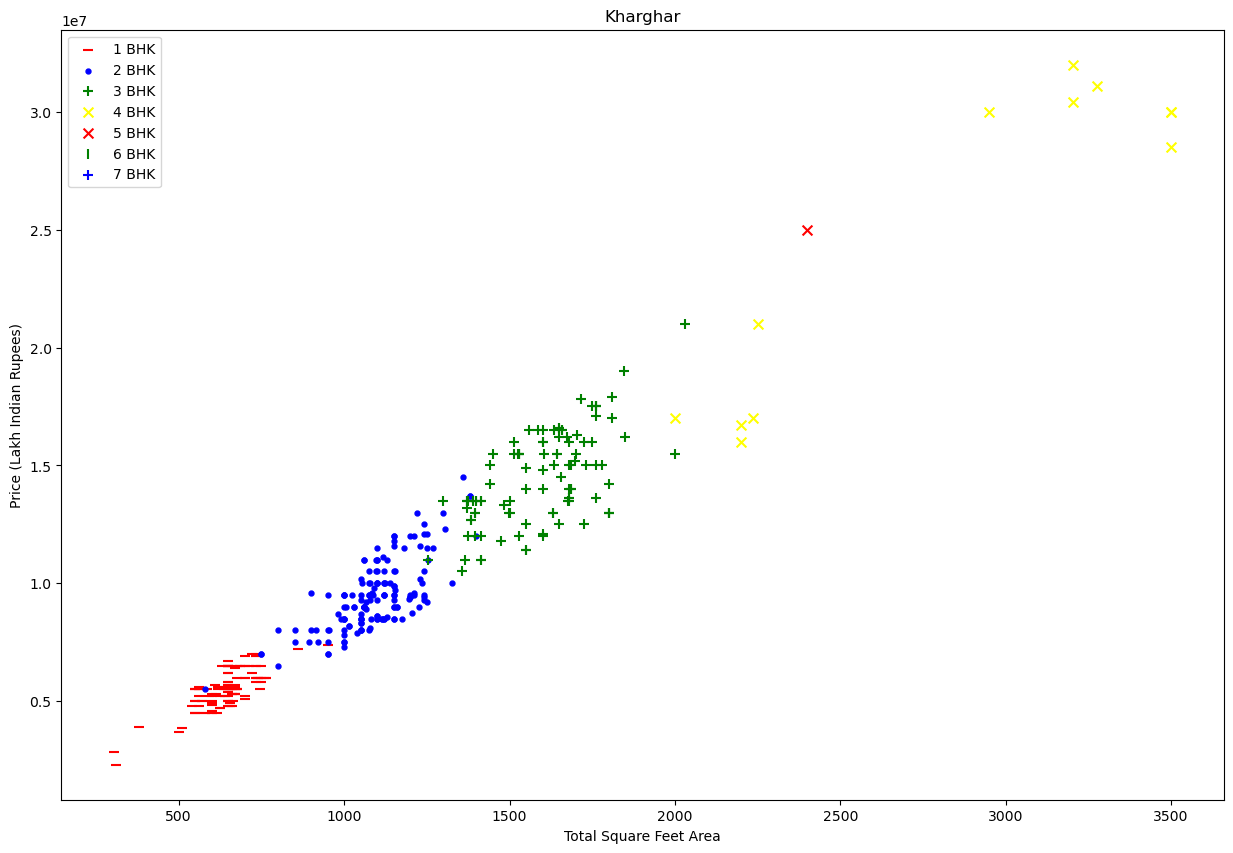

In [33]:
plot_scatter_chart(df4,"Kharghar")

# scatter plot of intial dataframe i.e. df1 of kharghar

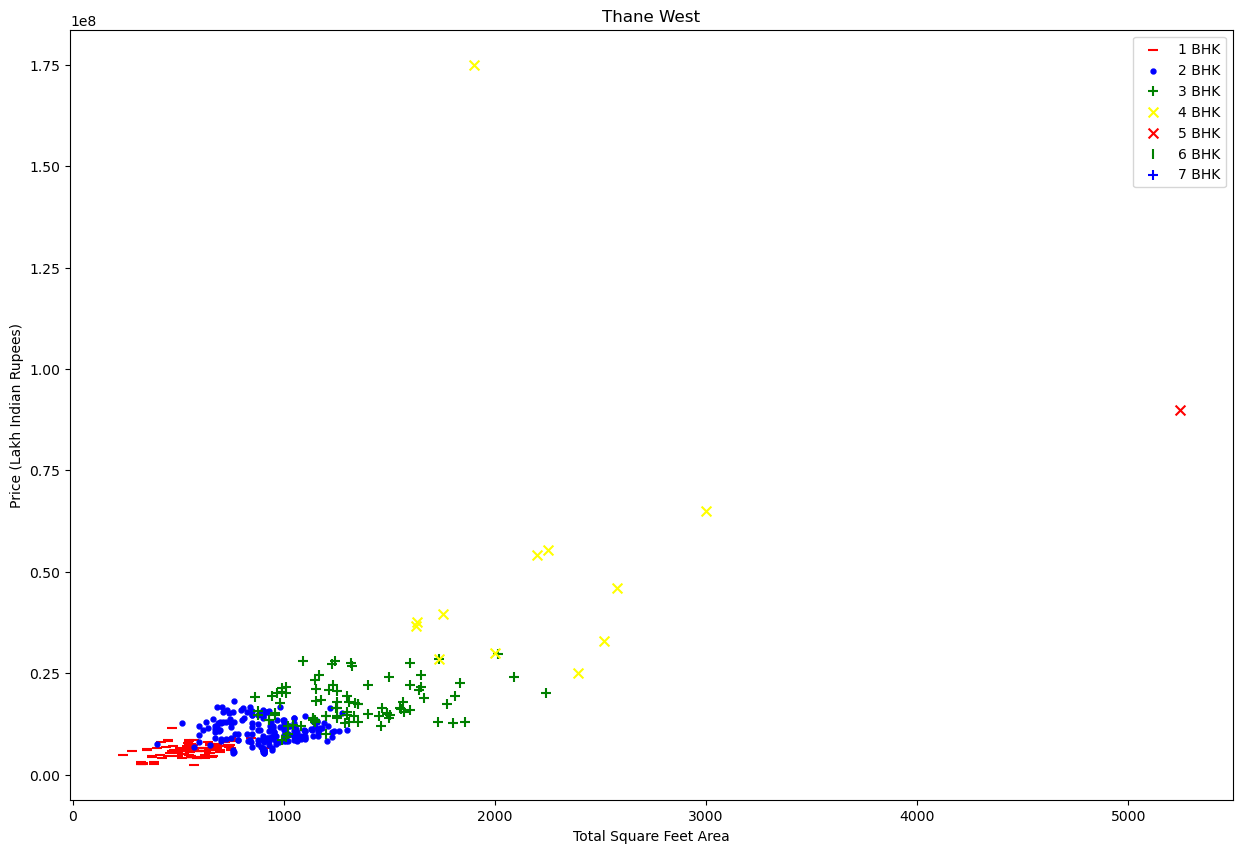

In [34]:
plot_scatter_chart(df1,"Thane West")

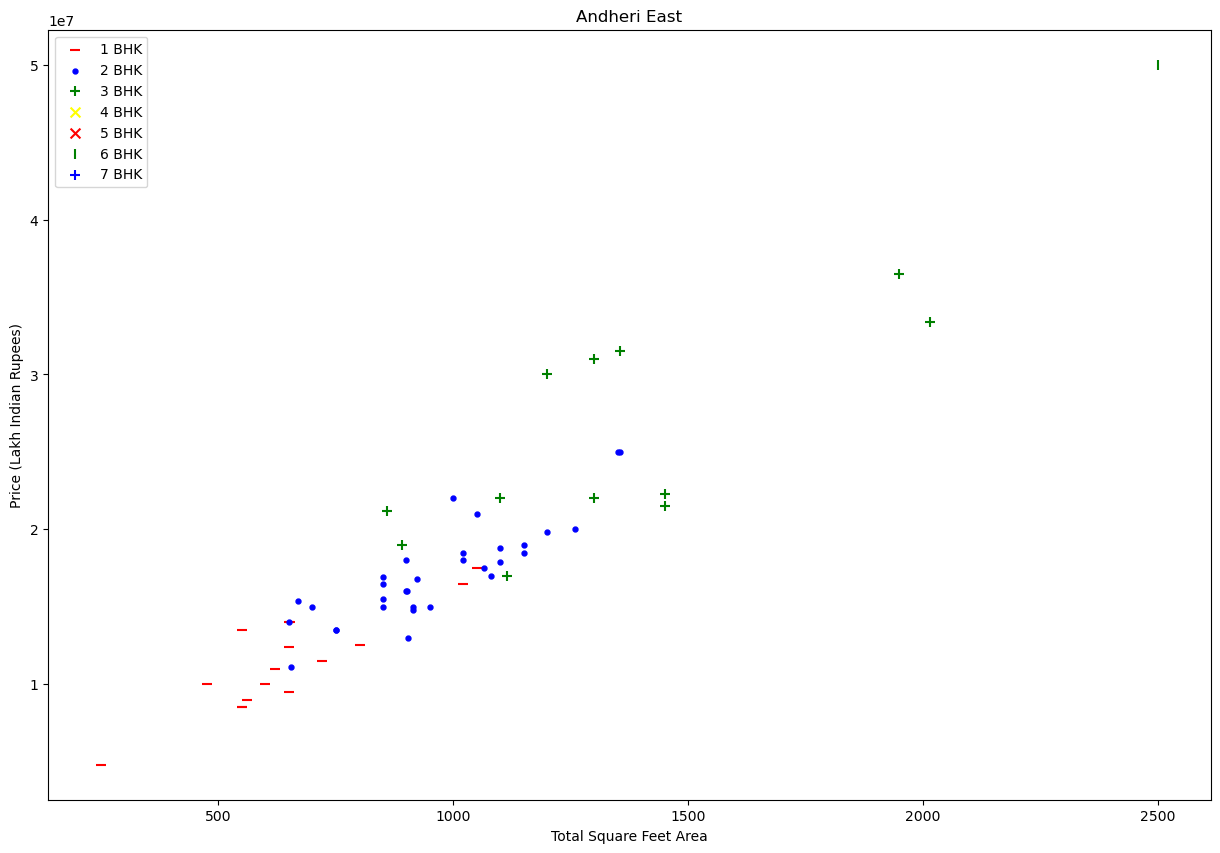

In [49]:
plot_scatter_chart(df4,"Andheri East")

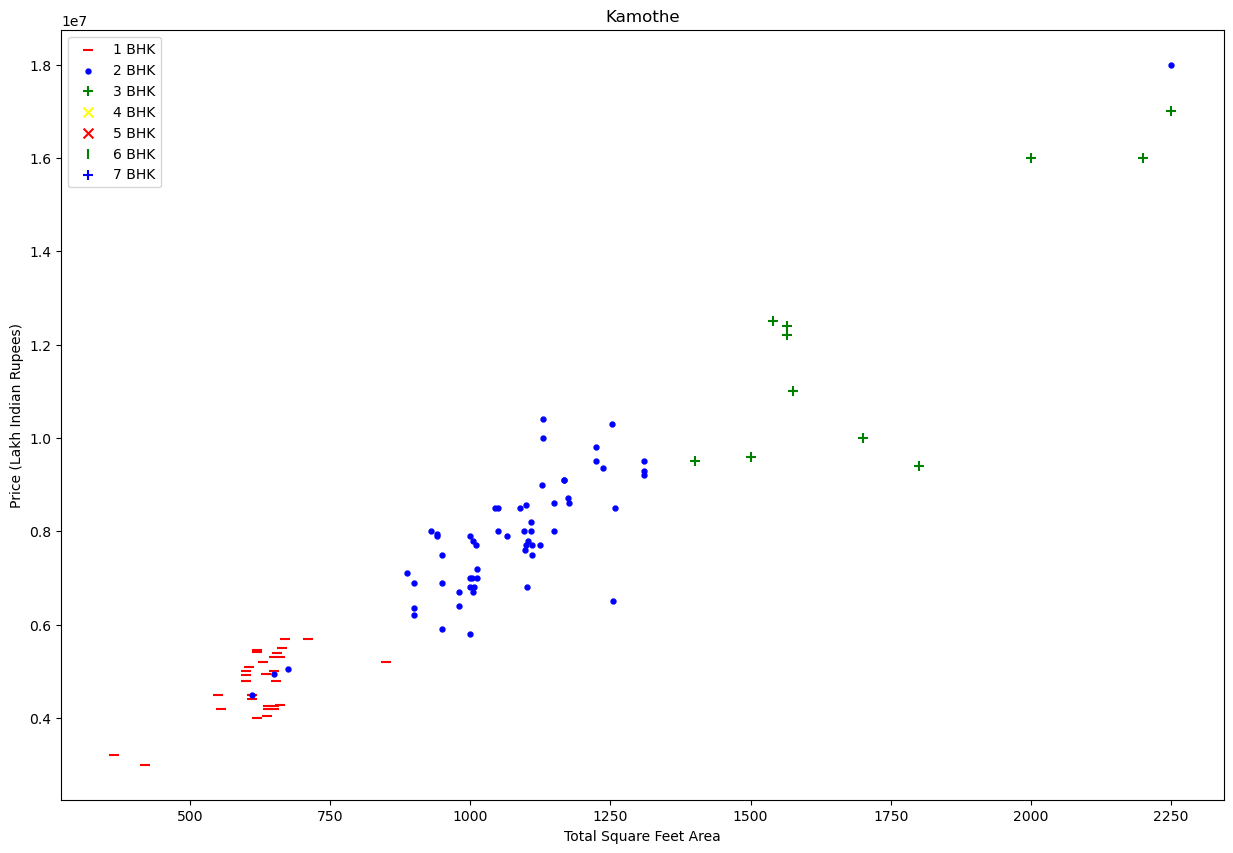

In [48]:
plot_scatter_chart(df4,"Kamothe")

In [35]:
df5 = df4.copy()

Text(0, 0.5, 'Count')

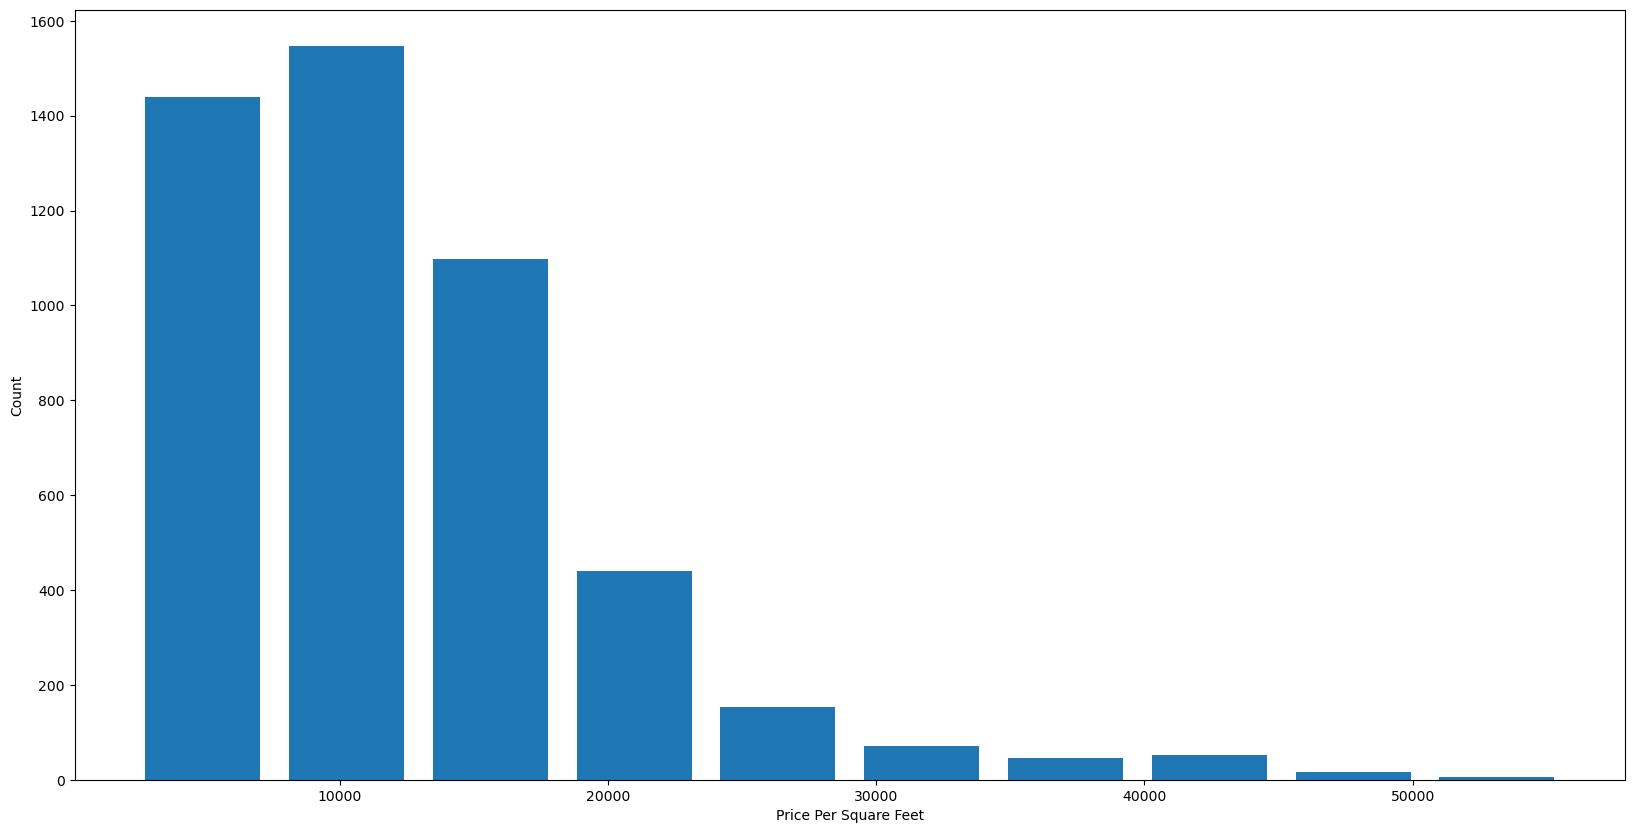

In [36]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [37]:
df5 = df5.rename({'Lift Available':'Lift_Available','Car Parking':'Car_Parking','Maintenance Staff':'Maintenance_Staff','24x7 Security':'Security','Children\'s Play Area':'Childrens_Play_Area','Landscaped Gardens':'Landscaped_Gardens','Indoor Games':'Indoor_Games','Gas Connection':'Gas_Connection','Jogging Track':'Jogging_Track','Swimming Pool':'Swimming_Pool'}, axis=1)

In [38]:
df5

,Price,Area,Location,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,Intercom,per_sqft
0,6200000,400,Airoli,1,0,1,1,1,1,0,0,0,15500.000000
1,9500000,1000,Airoli,2,0,1,1,1,1,0,1,0,9500.000000
2,14900000,1245,Airoli,2,0,1,1,0,0,0,0,0,11967.871486
3,14000000,1183,Airoli,2,1,1,1,0,1,1,1,1,11834.319527
4,14800000,1245,Airoli,2,0,1,1,1,1,0,0,0,11887.550201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,4500000,325,other,1,0,0,0,0,0,0,0,0,13846.153846
4865,4260000,695,other,1,0,1,0,0,0,0,0,0,6129.496403
4866,3500000,650,other,1,0,1,1,1,0,1,0,0,5384.615385
4867,2465000,700,other,1,0,0,0,0,0,0,0,0,3521.428571


In [39]:
df5.head(2300)

,Price,Area,Location,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,Intercom,per_sqft
0,6200000,400,Airoli,1,0,1,1,1,1,0,0,0,15500.000000
1,9500000,1000,Airoli,2,0,1,1,1,1,0,1,0,9500.000000
2,14900000,1245,Airoli,2,0,1,1,0,0,0,0,0,11967.871486
3,14000000,1183,Airoli,2,1,1,1,0,1,1,1,1,11834.319527
4,14800000,1245,Airoli,2,0,1,1,1,1,0,0,0,11887.550201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,12900000,1066,Malad West,2,0,0,0,0,0,0,0,0,12101.313321
2296,9200000,750,Malad West,1,1,1,0,0,0,1,1,1,12266.666667
2297,17800000,1350,Malad West,3,1,1,1,0,1,1,1,1,13185.185185
2298,13000000,990,Malad West,2,1,1,1,1,1,1,1,1,13131.313131


In [40]:
df5 = df5.drop(['per_sqft'], axis='columns')

In [41]:
df5


,Price,Area,Location,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,Intercom
0,6200000,400,Airoli,1,0,1,1,1,1,0,0,0
1,9500000,1000,Airoli,2,0,1,1,1,1,0,1,0
2,14900000,1245,Airoli,2,0,1,1,0,0,0,0,0
3,14000000,1183,Airoli,2,1,1,1,0,1,1,1,1
4,14800000,1245,Airoli,2,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4864,4500000,325,other,1,0,0,0,0,0,0,0,0
4865,4260000,695,other,1,0,1,0,0,0,0,0,0
4866,3500000,650,other,1,0,1,1,1,0,1,0,0
4867,2465000,700,other,1,0,0,0,0,0,0,0,0


In [65]:
gfgf=df5.to_csv("ggg.csv")

In [66]:
df5['Location'].unique()

array(['Airoli', 'Ambernath East', 'Ambernath West', 'Andheri',
       'Andheri East', 'Andheri West', 'Badlapur', 'Badlapur East',
       'Badlapur West', 'Bandra East', 'Bandra West', 'Belapur',
       'Bhandup West', 'Bhayandar East', 'Bhiwandi', 'Boisar',
       'Borivali East', 'Borivali West', 'Chembur', 'Chembur East',
       'Dahisar', 'Dahisar East', 'Dahisar West', 'Dattapada',
       'Dombivali', 'Dombivali East', 'Dombivli (West)', 'Dronagiri',
       'Ghansoli', 'Ghatkopar', 'Ghatkopar East', 'Ghatkopar West',
       'Goregaon', 'Goregaon East', 'Goregaon West',
       'Hiranandani Estates', 'Jogeshwari East', 'Jogeshwari West',
       'Juhu', 'Kalamboli', 'Kalwa', 'Kalyan East', 'Kalyan West',
       'Kamothe', 'Kandivali', 'Kandivali East', 'Kandivali West',
       'Kanjurmarg', 'Karanjade', 'Karjat', 'Kavesar', 'Kewale', 'Khar',
       'Khar West', 'Kharghar', 'Kolshet Road',
       'Koparkhairane Station Road', 'Koper Khairane', 'Koproli', 'Kurla',
       'Kurla West',

Text(0, 0.5, 'Count')

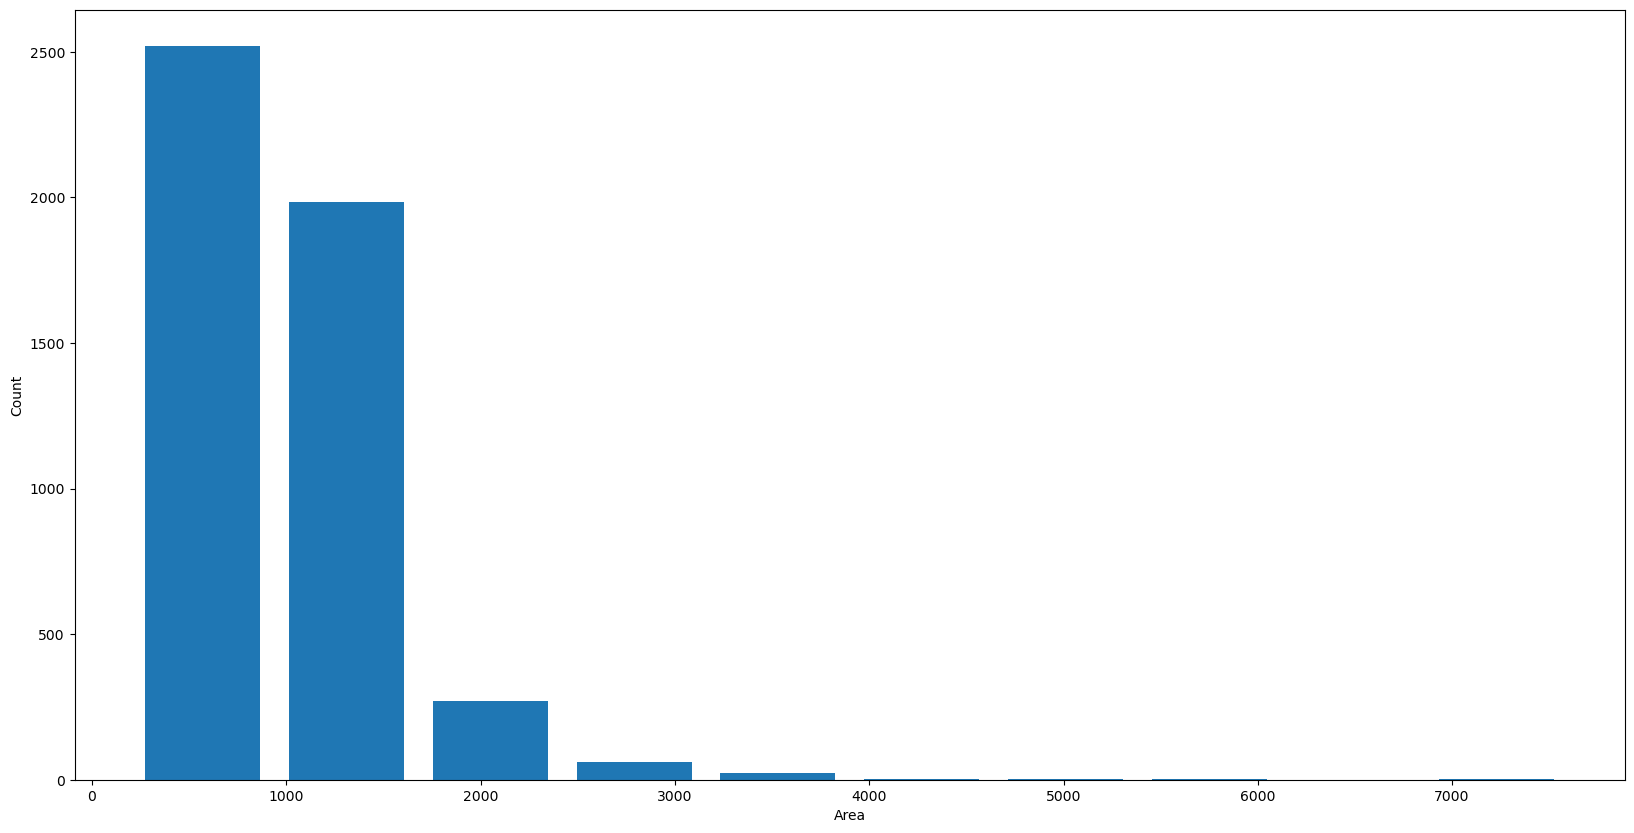

In [42]:
plt.hist(df5.Area,rwidth=0.8)
plt.xlabel("Area")
plt.ylabel("Count")

In [45]:
#gfg_csv_data = df6.to_csv('GfG.csv', index = True)

In [43]:
dummies = pd.get_dummies(df5.Location)
dummies.head(20)

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur,Badlapur East,Badlapur West,Bandra East,...,Vikhroli,Vile Parle East,Vile Parle West,Virar,Virar East,Virar West,Wadala,Wadala East,Worli,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df7 = pd.concat([df5,dummies.drop(['other'],axis=1)],axis = 'columns')

In [45]:
df7

,Price,Area,Location,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,...,Vashi,Vikhroli,Vile Parle East,Vile Parle West,Virar,Virar East,Virar West,Wadala,Wadala East,Worli
0,6200000,400,Airoli,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9500000,1000,Airoli,2,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,Airoli,2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,Airoli,2,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,Airoli,2,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,4500000,325,other,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4865,4260000,695,other,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4866,3500000,650,other,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4867,2465000,700,other,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df7.drop(['Location'], axis=1,inplace=True)

In [47]:
df7

,Price,Area,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,...,Vashi,Vikhroli,Vile Parle East,Vile Parle West,Virar,Virar East,Virar West,Wadala,Wadala East,Worli
0,6200000,400,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500000,1000,2,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,2,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,2,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,4500000,325,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4865,4260000,695,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4866,3500000,650,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4867,2465000,700,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df7.shape

(4869, 138)

In [49]:
df9 = df7.copy()

In [50]:
df9


,Price,Area,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,...,Vashi,Vikhroli,Vile Parle East,Vile Parle West,Virar,Virar East,Virar West,Wadala,Wadala East,Worli
0,6200000,400,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500000,1000,2,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14900000,1245,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14000000,1183,2,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,14800000,1245,2,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,4500000,325,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4865,4260000,695,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4866,3500000,650,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4867,2465000,700,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X = df9.drop('Price',axis=1)

In [52]:
X


,Area,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,Intercom,...,Vashi,Vikhroli,Vile Parle East,Vile Parle West,Virar,Virar East,Virar West,Wadala,Wadala East,Worli
0,400,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,2,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1245,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1183,2,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1245,2,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4864,325,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4865,695,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4866,650,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,700,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Y = df9.Price

In [54]:
Y

0        6200000
1        9500000
2       14900000
3       14000000
4       14800000
          ...   
4864     4500000
4865     4260000
4866     3500000
4867     2465000
4868     2485000
Name: Price, Length: 4869, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)
LR_prediction=lr_clf.predict(X_test)

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.87962836, 0.86640488, 0.86573152, 0.85430505, 0.8681686 ])

In [58]:
X.columns

Index(['Area', 'BHK', 'Gymnasium', 'Lift_Available', 'Car_Parking',
       'Maintenance_Staff', 'Security', 'Childrens_Play_Area', 'Clubhouse',
       'Intercom',
       ...
       'Vashi', 'Vikhroli', 'Vile Parle East', 'Vile Parle West', 'Virar',
       'Virar East', 'Virar West', 'Wadala', 'Wadala East', 'Worli'],
      dtype='object', length=137)

In [59]:
len(X.columns)

137

In [60]:
np.where(X.columns=='Worli')[0][0]

136

In [61]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [62]:
def predict_price1(Location,Area,BHK,Gymnasium,Lift_Available,Car_Parking,Maintenance_Staff,Security,Childrens_Play_Area,Clubhouse,Intercom):
  loc_index = np.where(X.columns==Location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = Area
  x[1] = BHK
  x[2] = Gymnasium
  x[3] = Lift_Available
  x[4] = Car_Parking
  x[5] = Maintenance_Staff
  x[6] = Security
  x[7] = Childrens_Play_Area
  x[8] = Clubhouse
  x[7] = Intercom

  if loc_index >=0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]

In [63]:
predict_price1('Airoli',1245,2,0,1,1,1,1,0,0,0)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


17637002.306849174

In [65]:
predict_price1('Airoli',1245,3,0,1,1,1,1,0,0,0)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


15593651.735461565

In [66]:
predict_price1('Airoli',2000,3,0,1,1,1,1,0,0,0)

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30478944.126464017

In [68]:
import pickle
with open('mumbai_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [70]:
import json
columns = {
    'data_columns' : [col.upper() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))